In [1]:
from data_generator import dataGenerator2d
from efficiency_joint_discretization import jointDiscretization
from joint_discretization import joint_discretization

In [2]:
# exp1 
types = 'mixed_circle'
data, y = dataGenerator2d(50, 50, types, noise=0.1).fit()

In [4]:
# old version
final_gain, dim_list, node_list, value_list = joint_discretization(data, y)
dim_list, value_list

([52], [0.0])

In [3]:
# new version
data['Y'] = y
best_subsetData_list, best_fmi, dim_list, best_value_list = jointDiscretization(data, permut=False)
dim_list, best_value_list

([1, 0, 14], [-0.04796035644149784, 0.7040192650338315, -3.398367558255966])

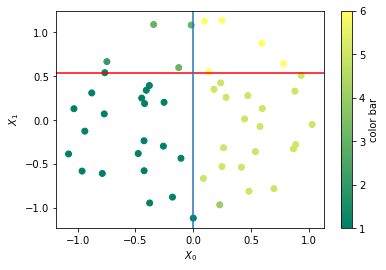

In [11]:
import numpy as np
import matplotlib.pyplot as plt

xx = []
yy = []
_class = [0 for _ in range(len(data))]
cnt = 0
for each_dic in best_subsetData_list:
    xx += list(each_dic['values'][:, 0])
    yy += list(each_dic['values'][:, 1])
    cnt += 1
    for key in each_dic['right']:
        for val in range(each_dic['right'][key]['min_index'], each_dic['right'][key]['max_index']):
            _class[val] = cnt

# scatterplot
plt.scatter(x=xx, y=yy, c=_class, cmap="summer")
plt.axhline(y=best_value_list[1], xmin=-1, xmax=1.0, color='r')
plt.axvline(x=best_value_list[0])
plt.colorbar(label="color bar")
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()

In [12]:
# exp2 
types = 'independent_circle'
data, y = dataGenerator2d(50, 50, types, noise=0.1).fit()

In [13]:
# old version
final_gain, dim_list, node_list, value_list = joint_discretization(data, y)
dim_list, value_list

([0, 0, 1, 1],
 [-0.5005936145646006,
  0.583591669671585,
  0.6382700797137713,
  -0.9157537920648119])

In [14]:
# new version
data['Y'] = y
best_subsetData_list, best_fmi, dim_list, best_value_list = jointDiscretization(data, permut=False)
dim_list, best_value_list

([0, 0, 1, 1],
 [-0.5005936145646006,
  0.583591669671585,
  -0.9157537920648119,
  0.46635776674802365])

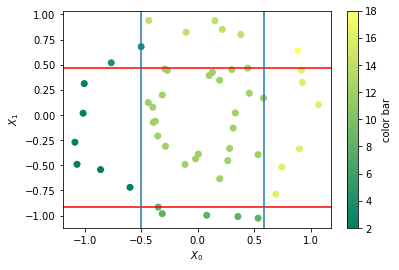

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xx = []
yy = []
_class = [0 for _ in range(len(data))]
cnt = 0
for each_dic in best_subsetData_list:
    xx += list(each_dic['values'][:, 0])
    yy += list(each_dic['values'][:, 1])
    cnt = cnt + 2
    for key in each_dic['right']:
        for val in range(each_dic['right'][key]['min_index'], each_dic['right'][key]['max_index']):
            _class[val] = cnt

# scatterplot
plt.scatter(x=xx, y=yy, c=_class, cmap="summer")
plt.axhline(y=best_value_list[2], xmin=-1, xmax=1.0, color='r')
plt.axhline(y=best_value_list[3], xmin=-1, xmax=1.0, color='r')

plt.axvline(x=best_value_list[0])
plt.axvline(x=best_value_list[1])
plt.colorbar(label="color bar")
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()